In [17]:
import requests
import pandas as pd

In [18]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [19]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-04-16 17:25:20.310057')

In [20]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [21]:
eth = get_historic_price('eth','bitstamp',after=last_week)

### Bitcoin:

In [22]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-04-16 18:00:00,40209.15,40248.25,40108.27,40145.23,8.502335,3.416143e+05
2022-04-16 19:00:00,40165.34,40217.15,40120.67,40203.35,8.285668,3.326832e+05
2022-04-16 20:00:00,40213.15,40267.19,40181.66,40228.65,7.465986,3.002864e+05
2022-04-16 21:00:00,40225.16,40392.58,40200.02,40296.26,11.934640,4.804185e+05
2022-04-16 22:00:00,40314.62,40619.08,40311.43,40513.61,28.059485,1.136128e+06


<AxesSubplot:xlabel='CloseTime'>

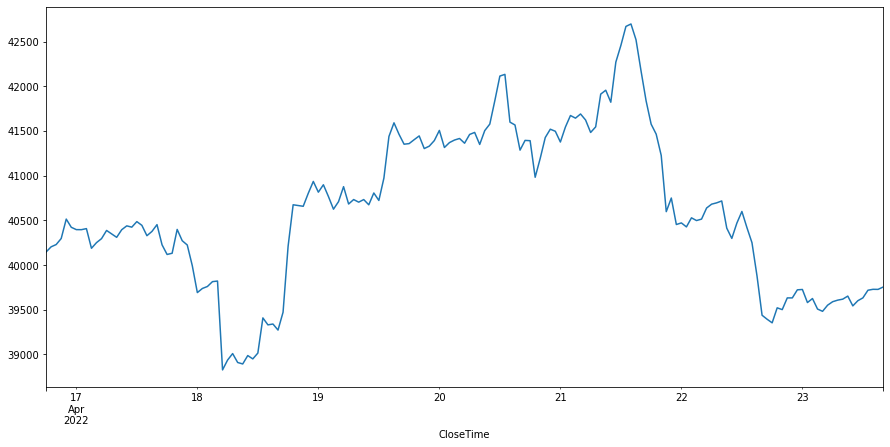

In [23]:
btc['ClosePrice'].plot(figsize=(15, 7))

### Ether:

In [24]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-04-16 18:00:00,3027.14,3029.73,3020.28,3020.50,17.907141,54127.646926
2022-04-16 19:00:00,3021.65,3027.54,3019.32,3027.54,42.567047,128618.927267
2022-04-16 20:00:00,3027.38,3030.30,3024.48,3025.97,64.757432,196032.047542
2022-04-16 21:00:00,3025.23,3043.02,3024.03,3034.05,43.126215,130736.328567
2022-04-16 22:00:00,3036.22,3055.87,3033.85,3055.87,48.813052,148593.693032


<AxesSubplot:xlabel='CloseTime'>

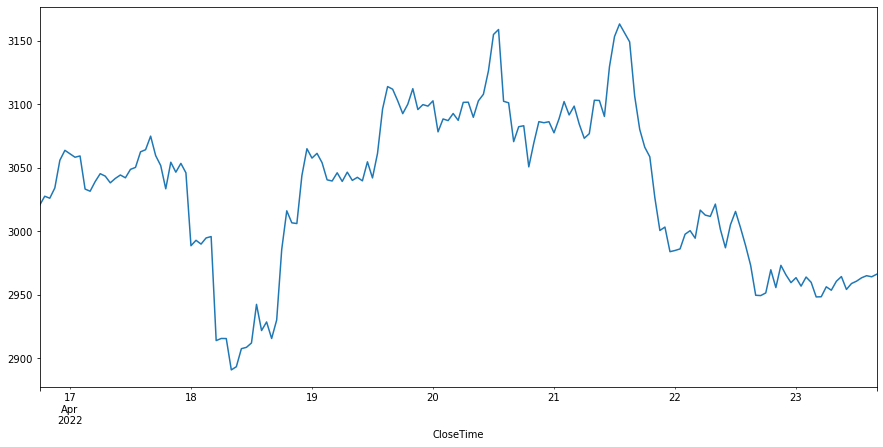

In [25]:
eth['ClosePrice'].plot(figsize=(15,7))

In [26]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [27]:
output_notebook()

Loading BokehJS ...

In [33]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)